In [1]:
!pip install seaborn


In [28]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import gmaps

# Import API key
from api_keys import g_key


In [3]:
happy_path2015 = "Resources/2015.csv"
happy_df2015 = pd.read_csv(happy_path2015)


In [4]:
happy_path2016 = "Resources/2016.csv"
happy_df2016 = pd.read_csv(happy_path2016)

In [5]:
happy_path2022 = "Resources/2022.csv"
happy_df2022 = pd.read_csv(happy_path2022)

**The Top 5 Happiest Countries of 2015**

In [6]:
happy_df2015.sort_values(by=['Happiness Score'], ascending=False)
happy_df2015[['Country','Happiness Score']].head()

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


**The 5 Least Happiest Countries of 2015**

In [7]:
happy_df2015.sort_values(by=['Happiness Score'])
happy_df2015[['Country','Happiness Score']].tail()

,Country,Happiness Score
153,Rwanda,3.465
154,Benin,3.340
155,Syria,3.006
156,Burundi,2.905
157,Togo,2.839


In [8]:
alco_path = 'Resources/alcohol.csv'
alco_df = pd.read_csv(alco_path)
alco_df = alco_df.loc[alco_df['Year'] ==2015]
alco_df=alco_df.rename(columns={"Entity":"Country"})

In [9]:
happy_alco = pd.merge(happy_df2015,alco_df, on="Country")

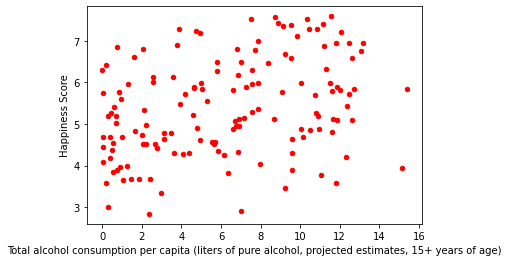

In [10]:
happy_alco.plot.scatter("Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",'Happiness Score',c='red')
plt.savefig('Images/happiness_vs_alcohol.png')

Correlation value is 0.7809655268660216


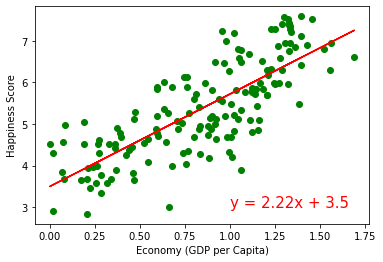

In [11]:
x_values = happy_df2015["Economy (GDP per Capita)"]
y_values = happy_df2015["Happiness Score"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='green')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.00,3),fontsize=15,color="red")
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
print(f"Correlation value is {correlation[0]}")
plt.savefig('Images/happiness_vs_economy.png')
plt.show()

In [12]:
internet_path = 'Resources/Internet Usage.csv'
internet_df = pd.read_csv(internet_path)
internet_df=internet_df.dropna()
internet_df = internet_df.drop(['Series Name','Series Code'] ,axis=1)
internet_df = internet_df.rename(columns={"Country Name":"Country"})
happy_internet = pd.merge(happy_df2015,internet_df, on="Country")
happy_internet['Internet 2015']=pd.to_numeric(happy_internet['2015 [YR2015]'], errors='coerce')
happy_internet = happy_internet.drop('2015 [YR2015]', axis=1)
happy_internet= happy_internet.dropna()

Correlation value is 0.7957739237373648


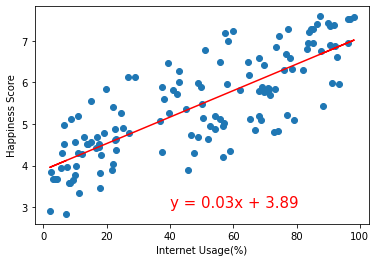

In [13]:
#happy_internet.plot.scatter('Internet 2015','Happiness Score')
x_values2 = happy_internet["Internet 2015"]
y_values2 = happy_internet["Happiness Score"]
correlation = st.pearsonr(x_values2,y_values2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values,"r-")
plt.annotate(line_eq,(40,3),fontsize=15,color="red")
plt.xlabel('Internet Usage(%)')
plt.ylabel('Happiness Score')
print(f"Correlation value is {correlation[0]}")
plt.savefig('Images/happiness_vs_internet.png')
plt.show()


In [14]:
happy_report_complete_path = 'Resources/happiness_report_complete.csv'
happy_report_complete_df = pd.read_csv(happy_report_complete_path)

In [15]:
happy_report_filtered_df = happy_report_complete_df.loc[(happy_report_complete_df['Country name']=="Denmark")|(happy_report_complete_df['Country name']=='China')|(happy_report_complete_df['Country name']=='United States')|(happy_report_complete_df['Country name']=='Russia')|(happy_report_complete_df['Country name']=='Afghanistan')]
happy_report_filtered_df = happy_report_filtered_df.iloc[: , [0, 1, 2]]
#pd.set_option("display.max_rows", None, "display.max_columns", None)
happy_report_filtered_df
filtered_data={'Afghanistan':[3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092],
             'China':[4.846295,4.454361,4.652737,5.037208,5.094917,5.241090,5.195619,5.303878,5.324956,5.099061,5.131434,5.144120],
             'Denmark':[7.970892,7.683359,7.770515,7.788232,7.519909,7.588607,7.507559,7.514425,7.557783,7.593702,7.648786,7.693003],
             'Russia':[5.618754,5.158228,5.384773,5.388766,5.620736,5.537178,6.036977,5.995539,5.854946,5.578743,5.513500,5.440524],
             'United States':[7.280386,7.158032,7.163616,7.115139,7.026227,7.249285,7.151114,6.863947,6.803600,6.991759,6.882685,6.943701],
             'Year':[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]}
new_happy_report_filtered_df=pd.DataFrame(data=filtered_data)


**Graph showing the Change in Happiness for Different Countries**

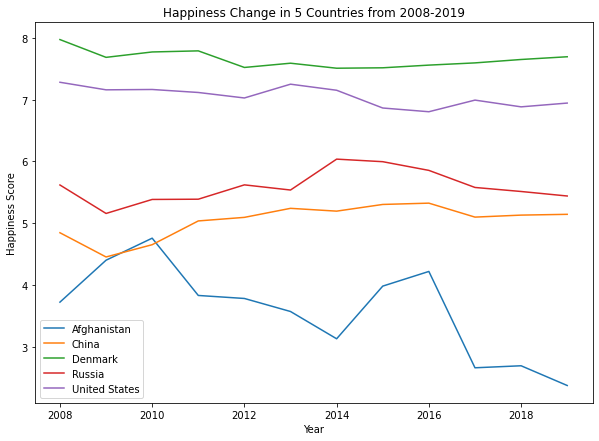

In [16]:

new_happy_report_filtered_df.plot.line(x='Year',figsize=(10,7),title="Happiness Change in 5 Countries from 2008-2019")
plt.ylabel("Happiness Score")
plt.savefig("Images/Happiness Change over Time")

In [17]:
obesity_path = 'Resources/obesity.csv'
obesity_df = pd.read_csv(obesity_path)
columnheaders = list(obesity_df.columns.values)
obesity_df = obesity_df[['Location', 'FactValueNumeric','Period', 'Dim1ValueCode' ]]
obesity_df = obesity_df.loc[obesity_df['Period'] ==2015]
obesity_df = obesity_df.loc[obesity_df['Dim1ValueCode'] =="BTSX"]
obesity_df = obesity_df.rename(columns={"Location":"Country", "Period": "Year", "Dim1ValueCode":"SEX"})


In [18]:
# merge the cells
happy_obese = pd.merge(happy_alco, obesity_df , on="Country", how ="left")
happy_obese = happy_obese.dropna()

In [19]:
y_axis = happy_obese["Happiness Score"]
x_axis = happy_obese["FactValueNumeric"]

Text(0, 0.5, 'Happiness Score')

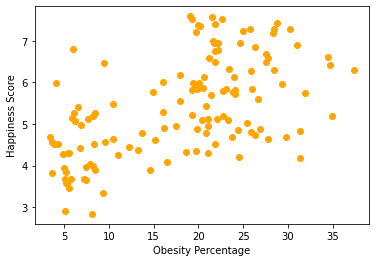

In [20]:
#Plotting scatter plot for Happiness Rank vs. FactValueNumeric
plt.scatter(x_axis,y_axis,c='orange')
plt.xlabel('Obesity Percentage')
plt.ylabel('Happiness Score')

The correlation value is 0.57


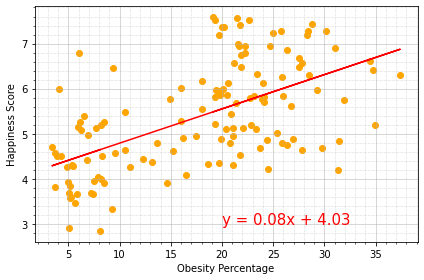

In [21]:
# Print out the r-squared value along with the plot.
y_values =  happy_obese["Happiness Score"]
x_values = happy_obese["FactValueNumeric"]
corr = round(st.pearsonr(x_values,y_values)[0],2)
print(f"The correlation value is {corr}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,3),fontsize=15,color="red")
plt.xlabel('Obesity Percentage')
plt.ylabel('Happiness Score')
#print the r-squared value
#print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
plt.tight_layout()
#plot
plt.savefig('Images/happiness_vs_obesity.png')
plt.show()

In [22]:
every_parameter_df= pd.merge(happy_alco, happy_internet, on='Country')
every_parameter_df = pd.merge(every_parameter_df, happy_obese, on='Country')

every_parameter_df
every_parameter_df = every_parameter_df.drop(every_parameter_df.columns[[4,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37]],axis=1)

In [23]:
every_parameter_df.drop(every_parameter_df.columns[[5,8,9,10,11,13,14]],axis=1,inplace=True)

In [24]:
rename_dict = {'Region_x':'Region',
               'Happiness Rank_x':'Happiness Rank',
               'Happiness Score_x':'Happiness Score',
               'Economy (GDP per Capita)_x':'Economy (GDP per Capita}',
               'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)_x':'Total alcohol consumption per capita',
               'FactValueNumeric':'Obesity Percentage'}






In [25]:
every_parameter_df=every_parameter_df.rename(columns=rename_dict)

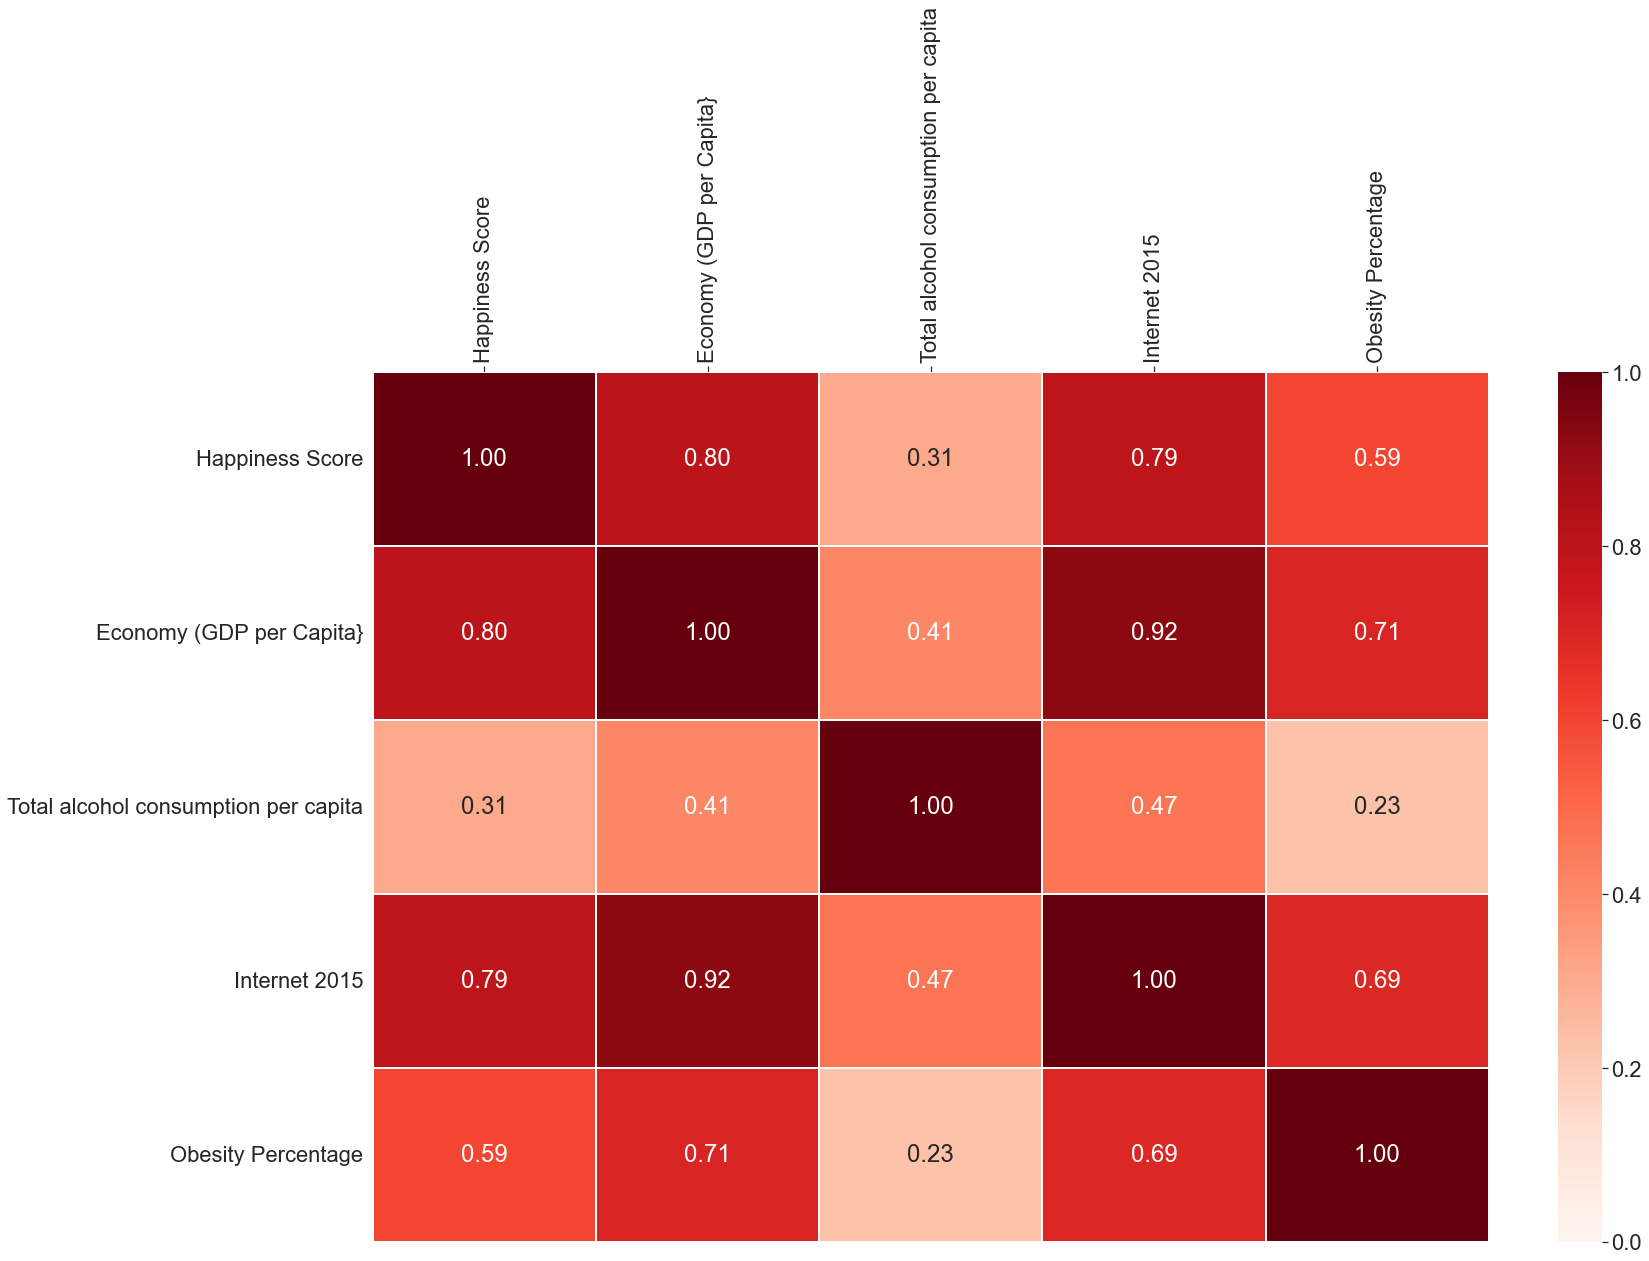

In [26]:
# Drop "Region" and "Happiness Rank" columns from the every_parameter_df for correlation calculation of all the parameters in the dataframe
all_parameter_df = every_parameter_df.drop(["Region", "Happiness Rank"], axis=1)
all_parameter_df
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=2)
plt.figure(figsize = (25,16))
ax=sns.heatmap(all_parameter_df.corr(), cmap="Reds", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)
# Save the plot in the "image" folder as figure_5
plt.savefig("images/figure_5.png")
# Show the plot
plt.show()

In [27]:
# Create a path and import coordinate data file as DataFrame
country_coord_path = 'resources/country_coord.csv'
country_coord_df = pd.read_csv(country_coord_path)

# clean country_coord_df
country_coord_df.rename(columns={"country": "Country", "latitude": "Latitude", "longitude": "Longitude"}, inplace=True)
country_coord_df = country_coord_df[["Country", "Latitude", "Longitude"]]
country_coord_df.dropna(inplace=True)
country_coord_df


# Merge country_coord with happy data
happy_country_df = pd.merge(all_parameter_df, country_coord_df, on="Country", how = "left")
#happy_country_df.to_csv('happy_country.csv')
happy_country_df.dropna(inplace=True)
happy_country_df


,Country,Happiness Score,Economy (GDP per Capita},Total alcohol consumption per capita,Internet 2015,Obesity Percentage,Latitude,Longitude
0,Switzerland,7.587,1.39651,11.58,87.479056,19.1,46.818188,8.227512
1,Iceland,7.561,1.30232,8.74,98.200000,21.5,64.963051,-19.020835
2,Denmark,7.527,1.32548,10.36,96.330502,19.3,56.263920,9.501785
3,Norway,7.522,1.45900,7.52,96.810326,22.6,60.472024,8.468946
4,Canada,7.427,1.32629,8.88,90.000000,28.8,56.130366,-106.346771
...,...,...,...,...,...,...,...,...
122,Afghanistan,3.575,0.31982,0.21,8.260000,5.2,33.939110,67.709953
123,Rwanda,3.465,0.22208,9.26,18.000000,5.6,-1.940278,29.873888
124,Benin,3.340,0.28665,2.97,11.254988,9.3,9.307690,2.315834
125,Burundi,2.905,0.01530,7.03,2.000000,5.1,-3.373056,29.918886


In [29]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Store latitude and longitude in locations (will be used for heatmap layer)
locations = happy_country_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float (will be used for heatmap layer)
happiness = happy_country_df["Happiness Score"]

# Plot Heatmap
fig = gmaps.figure()

# Set the max intensity to max humidity in our data to caps off the maximum peak intensity
max_happiness = happiness.max()

# Creat the heatmap layer - pass in the required parameters (locations, weights, max intensity ) 
heatmap_layer = gmaps.heatmap_layer(locations, weights = happiness, max_intensity = max_happiness)

# Add the layer to the map
fig.add_layer(heatmap_layer)
fig



Figure(layout=FigureLayout(height='420px'))